# Exploring the ERA-NUTS dataset

*M. De Felice, K. Kavvadias* <br> *JRC, European Commission*

***

This notebook tries to give a quick introduction to the use of the ERA-NUTS data (in NetCDF format) with Python.

The notebook has been compiled using Python 3.8.6, Jupyter and the following packages:

 - [matplotlib](https://matplotlib.org/) (3.3.3)
 - [numpy](https://www.numpy.org/) (1.19.5)
 - [pandas](https://pandas.pydata.org/) (1.2.0)
 - [xarray](http://xarray.pydata.org/) (0.16.2)
 
 The packages [dask](http://dask.pydata.org) and [netcdf4](http://dask.pydata.org) are also needed for out-of-core manipulation of ERA-NUTS NetCDFs. 
 
 *Side note: all those packages are part of PyData, a programme of [NumFocus](https://numfocus.org/sponsored-projects)*

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [25]:
# A bit of customisation
matplotlib.rcParams['figure.figsize'] = (18.0, 5.0)

# %matplotlib inline
%config InlineBackend.figure_format='retina'

np.set_printoptions(precision=3, suppress=True)  # suppress scientific float notation

**This is very important**: set the absolute path to your NetCDF.

In [26]:
path = r'/emhires-data/data-warehouse/tabular/ERA-NUTS/'

## Load data
Load all the files as a single dataset using xarray and its dask capabilities. In this way the files are not loaded in-memory but dask/xarray load them **only** when needed. `mask_and_scale` to True replaces array values equal to `_FillValue` with NA and scale values according to the formula `original_values * scale_factor + add_offset`.


In [27]:
ds = xr.open_mfdataset(path + 'data-zenodo/netcdf/*nuts2*.nc', mask_and_scale=True)
ds

<xarray.Dataset>
Dimensions:  (region: 309, time: 359424)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2020-12-31T23:00:00
  * region   (region) object 'AL01' 'AL02' 'AL03' ... 'UKM8' 'UKM9' 'UKN0'
Data variables:
    CDD      (time, region) float32 dask.array<chunksize=(359424, 309), meta=np.ndarray>
    CS       (time, region) float32 dask.array<chunksize=(359424, 309), meta=np.ndarray>
    HDD      (time, region) float32 dask.array<chunksize=(359424, 309), meta=np.ndarray>
    ro       (time, region) float32 dask.array<chunksize=(359424, 309), meta=np.ndarray>
    sd       (time, region) float32 dask.array<chunksize=(359424, 309), meta=np.ndarray>
    ssrd     (time, region) float32 dask.array<chunksize=(359424, 309), meta=np.ndarray>
    ssrdc    (time, region) float32 dask.array<chunksize=(359424, 309), meta=np.ndarray>
    t2m      (time, region) float32 dask.array<chunksize=(359424, 309), meta=np.ndarray>
    ws10     (time, region) float32 dask.array<chunksize=(359424, 309), meta=np.ndarray>
    ws100    (time, region) float32 dask.array<chunksize=(359424, 309), meta=np.ndarray>

In [41]:
ds = xr.open_mfdataset(path + 'data-zenodo/netcdf/era-nuts-*-nuts2-hourly.nc', mask_and_scale = True)

As you can see we have all the 309 NUTS 2 regions and 341880 hourly time steps ready in a xarray dataset. All the variables are stored in a `dask.array`

In [42]:
print(ds.region.values)

['AL01' 'AL02' 'AL03' 'AT11' 'AT12' 'AT13' 'AT21' 'AT22' 'AT31' 'AT32'
 'AT33' 'AT34' 'BE21' 'BE22' 'BE23' 'BE24' 'BE25' 'BE31' 'BE32' 'BE33'
 'BE34' 'BE35' 'BG31' 'BG32' 'BG33' 'BG34' 'BG41' 'BG42' 'CH01' 'CH02'
 'CH03' 'CH04' 'CH05' 'CH06' 'CH07' 'CY00' 'CZ01' 'CZ02' 'CZ03' 'CZ04'
 'CZ05' 'CZ06' 'CZ07' 'CZ08' 'DE11' 'DE12' 'DE13' 'DE14' 'DE21' 'DE22'
 'DE23' 'DE24' 'DE25' 'DE26' 'DE27' 'DE30' 'DE40' 'DE60' 'DE71' 'DE72'
 'DE73' 'DE80' 'DE91' 'DE92' 'DE93' 'DE94' 'DEA1' 'DEA2' 'DEA3' 'DEA4'
 'DEA5' 'DEB1' 'DEB2' 'DEB3' 'DEC0' 'DED2' 'DED4' 'DED5' 'DEE0' 'DEF0'
 'DEG0' 'DK01' 'DK02' 'DK03' 'DK04' 'DK05' 'EE00' 'EL30' 'EL41' 'EL42'
 'EL43' 'EL51' 'EL52' 'EL53' 'EL54' 'EL61' 'EL62' 'EL63' 'EL64' 'EL65'
 'ES11' 'ES12' 'ES13' 'ES21' 'ES22' 'ES23' 'ES24' 'ES30' 'ES41' 'ES42'
 'ES43' 'ES51' 'ES52' 'ES53' 'ES61' 'ES62' 'FI19' 'FI1B' 'FI1C' 'FI1D'
 'FI20' 'FR10' 'FRB0' 'FRC1' 'FRC2' 'FRD1' 'FRD2' 'FRE1' 'FRE2' 'FRF1'
 'FRF2' 'FRF3' 'FRG0' 'FRH0' 'FRI1' 'FRI2' 'FRI3' 'FRJ1' 'FRJ2' 'FRK1'
 'FRK2

## Subsetting
We can use the xarray functions to subset the data: the subsetting is done out-of-memory. 
Most of the work is done by using `sel` function from xarray. For example to select a region (North-Holland):

In [43]:
ds.sel(region='NL32') # By region

<xarray.Dataset>
Dimensions:  (time: 359424)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2020-12-31T23:00:00
    region   <U4 'NL32'
Data variables:
    CS       (time) float32 dask.array<chunksize=(359424,), meta=np.ndarray>
    ro       (time) float32 dask.array<chunksize=(359424,), meta=np.ndarray>
    sd       (time) float32 dask.array<chunksize=(359424,), meta=np.ndarray>
    ssrd     (time) float32 dask.array<chunksize=(359424,), meta=np.ndarray>
    ssrdc    (time) float32 dask.array<chunksize=(359424,), meta=np.ndarray>
    t2m      (time) float32 dask.array<chunksize=(359424,), meta=np.ndarray>
    ws10     (time) float32 dask.array<chunksize=(359424,), meta=np.ndarray>
    ws100    (time) float32 dask.array<chunksize=(359424,), meta=np.ndarray>

Or selecting all the data for a specific year:

In [44]:
ds.sel(time='2000') # year

<xarray.Dataset>
Dimensions:  (region: 309, time: 8784)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-31T23:00:00
  * region   (region) object 'AL01' 'AL02' 'AL03' ... 'UKM8' 'UKM9' 'UKN0'
Data variables:
    CS       (time, region) float32 dask.array<chunksize=(8784, 309), meta=np.ndarray>
    ro       (time, region) float32 dask.array<chunksize=(8784, 309), meta=np.ndarray>
    sd       (time, region) float32 dask.array<chunksize=(8784, 309), meta=np.ndarray>
    ssrd     (time, region) float32 dask.array<chunksize=(8784, 309), meta=np.ndarray>
    ssrdc    (time, region) float32 dask.array<chunksize=(8784, 309), meta=np.ndarray>
    t2m      (time, region) float32 dask.array<chunksize=(8784, 309), meta=np.ndarray>
    ws10     (time, region) float32 dask.array<chunksize=(8784, 309), meta=np.ndarray>
    ws100    (time, region) float32 dask.array<chunksize=(8784, 309), meta=np.ndarray>

Or a month:

In [45]:
ds.sel(time='2000-08') # year

<xarray.Dataset>
Dimensions:  (region: 309, time: 744)
Coordinates:
  * time     (time) datetime64[ns] 2000-08-01 ... 2000-08-31T23:00:00
  * region   (region) object 'AL01' 'AL02' 'AL03' ... 'UKM8' 'UKM9' 'UKN0'
Data variables:
    CS       (time, region) float32 dask.array<chunksize=(744, 309), meta=np.ndarray>
    ro       (time, region) float32 dask.array<chunksize=(744, 309), meta=np.ndarray>
    sd       (time, region) float32 dask.array<chunksize=(744, 309), meta=np.ndarray>
    ssrd     (time, region) float32 dask.array<chunksize=(744, 309), meta=np.ndarray>
    ssrdc    (time, region) float32 dask.array<chunksize=(744, 309), meta=np.ndarray>
    t2m      (time, region) float32 dask.array<chunksize=(744, 309), meta=np.ndarray>
    ws10     (time, region) float32 dask.array<chunksize=(744, 309), meta=np.ndarray>
    ws100    (time, region) float32 dask.array<chunksize=(744, 309), meta=np.ndarray>

In [46]:
ds.sel(time=slice('2000-01', '2000-04'))

<xarray.Dataset>
Dimensions:  (region: 309, time: 2904)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-04-30T23:00:00
  * region   (region) object 'AL01' 'AL02' 'AL03' ... 'UKM8' 'UKM9' 'UKN0'
Data variables:
    CS       (time, region) float32 dask.array<chunksize=(2904, 309), meta=np.ndarray>
    ro       (time, region) float32 dask.array<chunksize=(2904, 309), meta=np.ndarray>
    sd       (time, region) float32 dask.array<chunksize=(2904, 309), meta=np.ndarray>
    ssrd     (time, region) float32 dask.array<chunksize=(2904, 309), meta=np.ndarray>
    ssrdc    (time, region) float32 dask.array<chunksize=(2904, 309), meta=np.ndarray>
    t2m      (time, region) float32 dask.array<chunksize=(2904, 309), meta=np.ndarray>
    ws10     (time, region) float32 dask.array<chunksize=(2904, 309), meta=np.ndarray>
    ws100    (time, region) float32 dask.array<chunksize=(2904, 309), meta=np.ndarray>

In [47]:
ds.sel(time = ds.time.dt.month.isin([6, 7, 8])) # Selecting June to August data for all the years

<xarray.Dataset>
Dimensions:  (region: 309, time: 90528)
Coordinates:
  * time     (time) datetime64[ns] 1980-06-01 ... 2020-08-31T23:00:00
  * region   (region) object 'AL01' 'AL02' 'AL03' ... 'UKM8' 'UKM9' 'UKN0'
Data variables:
    CS       (time, region) float32 dask.array<chunksize=(90528, 309), meta=np.ndarray>
    ro       (time, region) float32 dask.array<chunksize=(90528, 309), meta=np.ndarray>
    sd       (time, region) float32 dask.array<chunksize=(90528, 309), meta=np.ndarray>
    ssrd     (time, region) float32 dask.array<chunksize=(90528, 309), meta=np.ndarray>
    ssrdc    (time, region) float32 dask.array<chunksize=(90528, 309), meta=np.ndarray>
    t2m      (time, region) float32 dask.array<chunksize=(90528, 309), meta=np.ndarray>
    ws10     (time, region) float32 dask.array<chunksize=(90528, 309), meta=np.ndarray>
    ws100    (time, region) float32 dask.array<chunksize=(90528, 309), meta=np.ndarray>

In [48]:
ds_sel = ds.sel(time = ds.time.dt.month.isin([6, 7, 8]))

After a selection a variable can be directly plot with a single line:

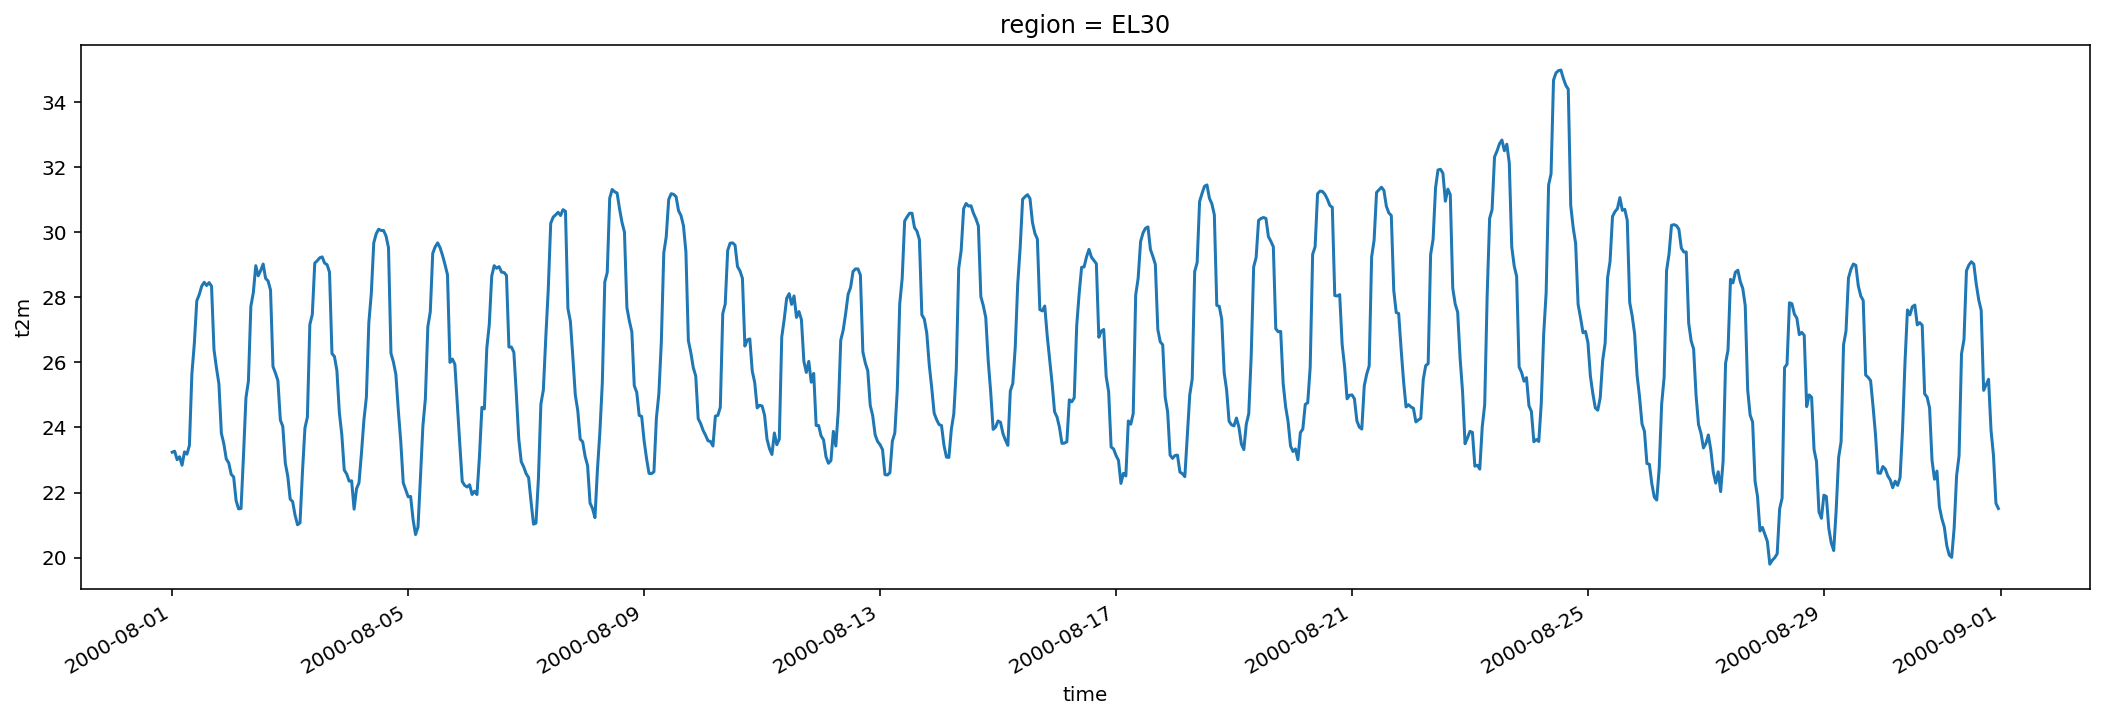

In [49]:
ds['t2m'].sel(time='2000-08', region='EL30').plot(); # temperature in August 2000 for Attica region in Greece

### Note on Dask-based out-of-core manipulation 
All the examples shown above does not involve necessarily the loading in memory of the ERA-NUTS dataset. This is one of the xarray features provided by Dask. There are many resources online that explain this, for example [here](https://geohackweek.github.io/nDarrays/08-out-of-core-computation/) and [here](http://xarray.pydata.org/en/stable/dask.html).

Practically, once a dataset is opened with `open_mfdataset` xarray will try to carry out all the computations without loading the data in memory, this is why all the variables are stored in `dask.array` instead than normal arrays. The data is finally loaded from disk whenever you need to save it, inspect it (for example accessing `values`) or when you call the method `compute()` or `load()` (see the documentation [here](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.compute.html)). 

For example, all the subsetting operations are performed in a lazy manner, this means that you can manipulate even datasets too big to fit into memory, possibly trying to perform the subsetting/selection operations early in the pipeline in order to reduce the size of the data that will be eventually loaded in memory (some optimisation tips can be found in the [xarray documentation](http://xarray.pydata.org/en/stable/dask.html#optimization-tips)).

This Dask feature is then the reason why the subsetting operations including the loading are very fast.

Here the execution time for loading and subsetting using Dask

In [37]:
%%timeit -n 3
ds = xr.open_mfdataset(path + 'data-zenodo/netcdf/*nuts2*.nc', mask_and_scale=True)
ds.sel(time=slice('2000-01', '2000-04'))

409 ms ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


Here the execution time for loading and subsetting **forcing** the load into memory with `load()`

In [38]:
%%timeit -n 3
ds = xr.open_mfdataset(path + 'data-zenodo/netcdf/*nuts2*.nc', mask_and_scale=True).load()
ds.sel(time=slice('2000-01', '2000-04'))

5.59 s ± 197 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


# Temporal aggregation and resampling
Using the `xarray` [grouping functions](http://xarray.pydata.org/en/stable/groupby.html) is easy to aggregate temporaly the dataset

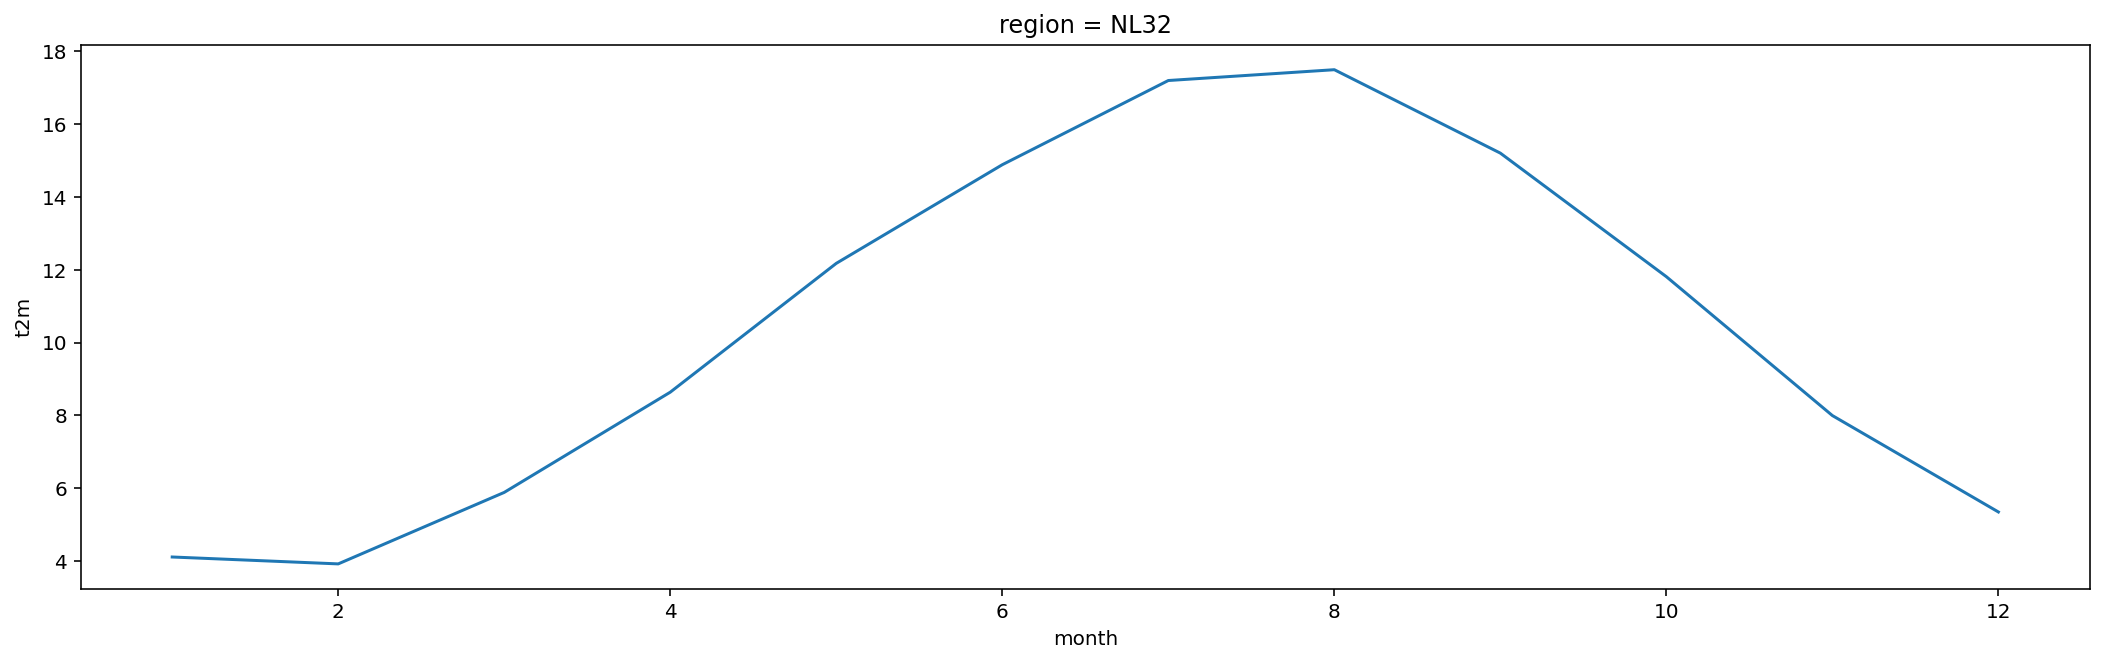

In [40]:
ds['t2m'].sel(region='NL32').groupby('time.month').mean('time').plot() # plot t2m monthly climatology of NL32

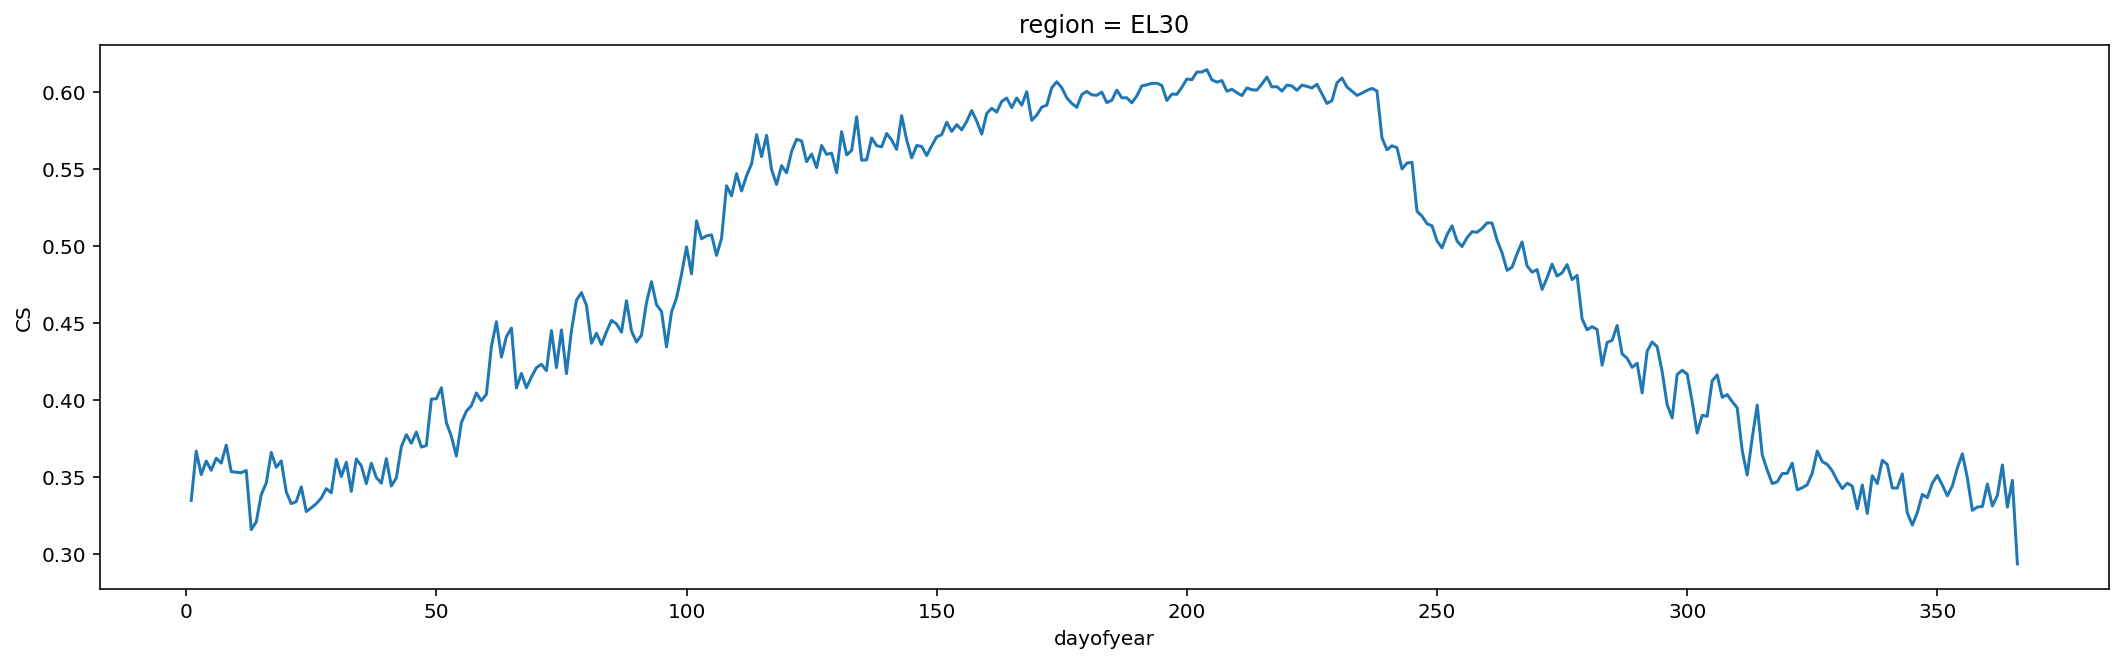

In [51]:
ds['CS'].sel(region='EL30').groupby('time.dayofyear').mean('time').plot() # daily climatology of Clear Sky in EL30

Resampling (changing the temporal resolution) is also easy with the `resample` function.

In [52]:
ds.resample(time='3M').mean() # Get the 3-month average of all the variables in the dataset

<xarray.Dataset>
Dimensions:  (region: 309, time: 165)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-31 1980-04-30 ... 2021-01-31
  * region   (region) object 'AL01' 'AL02' 'AL03' ... 'UKM8' 'UKM9' 'UKN0'
Data variables:
    CS       (time, region) float32 dask.array<chunksize=(1, 309), meta=np.ndarray>
    ro       (time, region) float32 dask.array<chunksize=(1, 309), meta=np.ndarray>
    sd       (time, region) float32 dask.array<chunksize=(1, 309), meta=np.ndarray>
    ssrd     (time, region) float32 dask.array<chunksize=(1, 309), meta=np.ndarray>
    ssrdc    (time, region) float32 dask.array<chunksize=(1, 309), meta=np.ndarray>
    t2m      (time, region) float32 dask.array<chunksize=(1, 309), meta=np.ndarray>
    ws10     (time, region) float32 dask.array<chunksize=(1, 309), meta=np.ndarray>
    ws100    (time, region) float32 dask.array<chunksize=(1, 309), meta=np.ndarray>

What is the correlation between the maximum monthly temperature between North-Holland (NL32) and Sicily (ITG1)? 

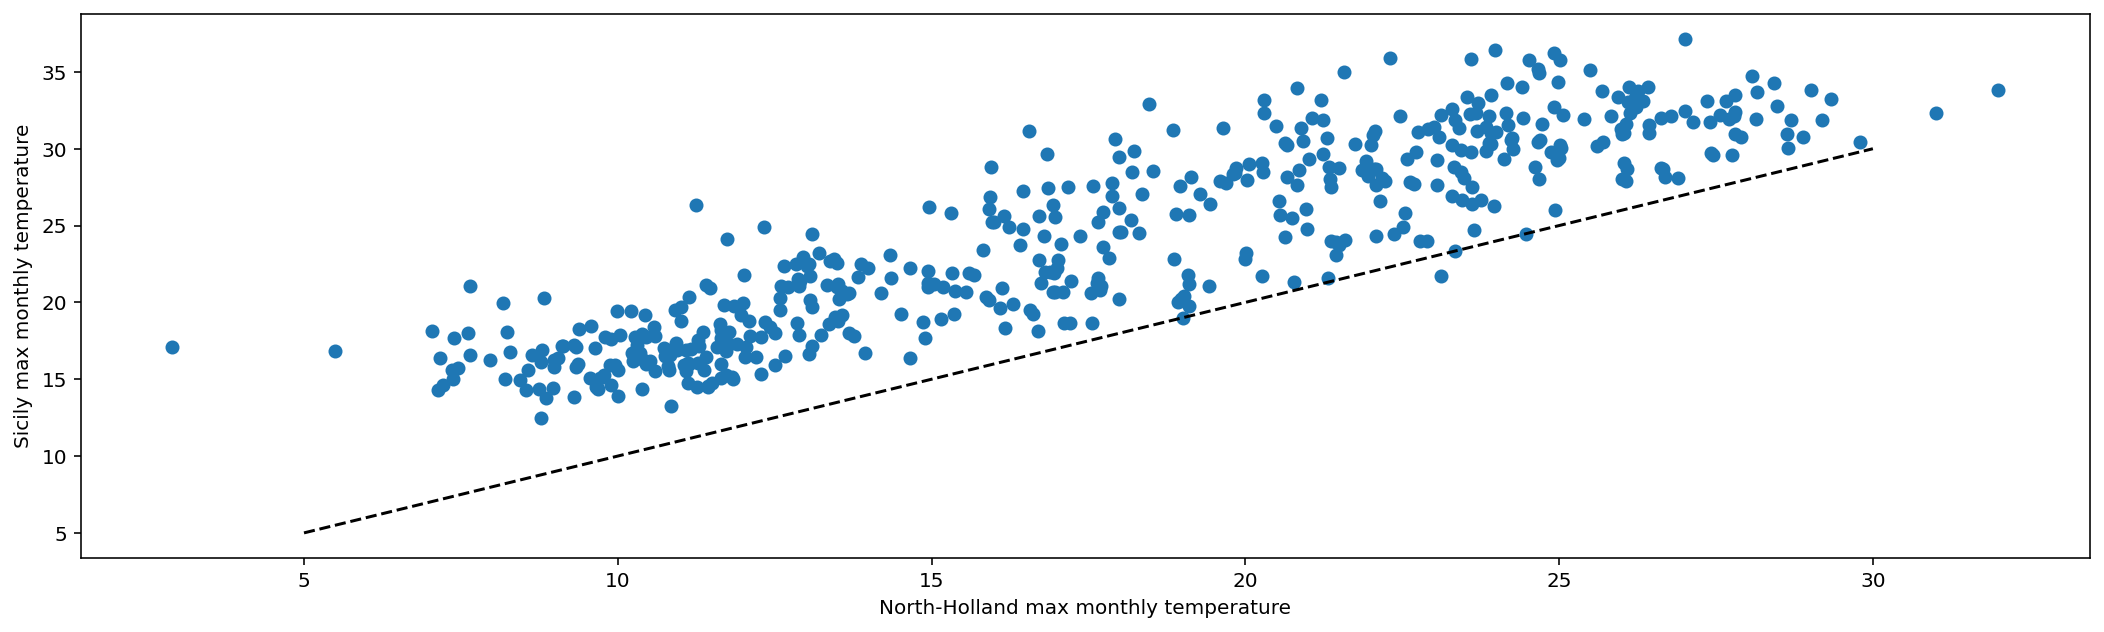

In [53]:
monthly_data = ds.resample(time='1M').max() # computing the max monthly values

plt.scatter(x=monthly_data['t2m'].sel(region='NL32'), y = monthly_data['t2m'].sel(region='ITG1'))
plt.plot((5,30),(5,30), 'k--') # Diagonal line
plt.xlabel('North-Holland max monthly temperature')
plt.ylabel('Sicily max monthly temperature')
plt.box(True)

Now for each month we can compute the difference the temperature and the average for that month (the so-called climatology). This difference is commonly called "anomaly". 

In [54]:
x = ds['t2m'].sel(region='NL32').resample(time='1M').mean() # Computing the monthly average

climatology = x.groupby('time.month').mean('time')

anomaly = x.groupby('time.month') - climatology

print(anomaly)

<xarray.DataArray 't2m' (time: 492)>
dask.array<getitem, shape=(492,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1980-01-31 1980-02-29 ... 2020-12-31
    region   <U4 'NL32'
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12


Now we can plot the anomaly and its rolling mean (for 36 months). For the latter, we need to load from the Dask array. 

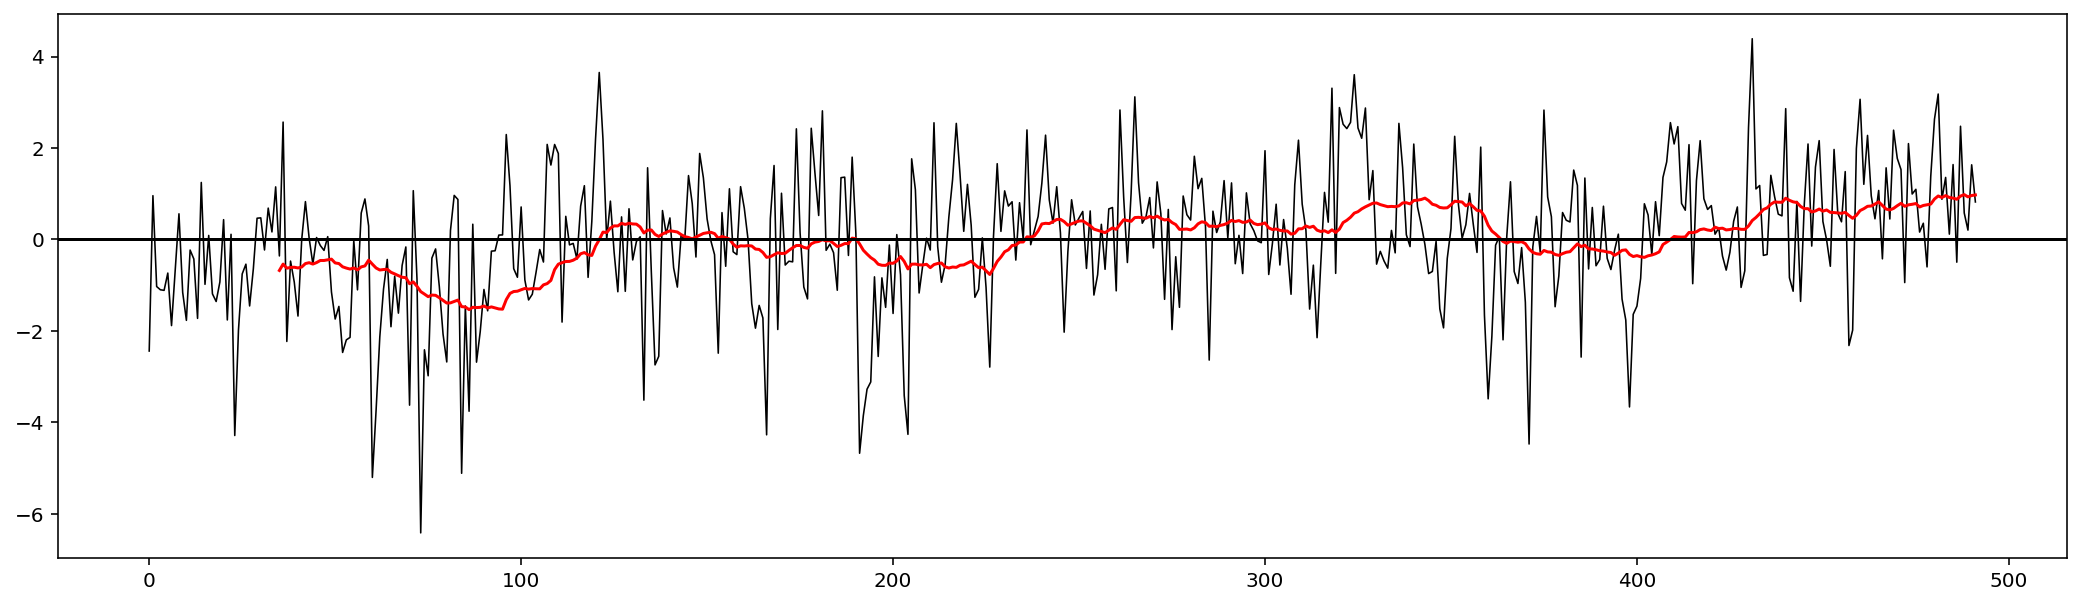

In [57]:
plt.plot(anomaly, color='black', lw=.8)
plt.plot(anomaly.load().rolling(time=36).mean(), color='red')
plt.axhline(y=0, color = 'k')

# Export
From xarray we can export the data to other data structures and export to different formats.

In [58]:
# A DataArray to Pandas
ds['ssrd'].sel(region='ITG1').to_pandas() # From xarray to Pandas

time
1980-01-01 00:00:00    0.0
1980-01-01 01:00:00    0.0
1980-01-01 02:00:00    0.0
1980-01-01 03:00:00    0.0
1980-01-01 04:00:00    0.0
                      ... 
2020-12-31 19:00:00    0.0
2020-12-31 20:00:00    0.0
2020-12-31 21:00:00    0.0
2020-12-31 22:00:00    0.0
2020-12-31 23:00:00    0.0
Length: 359424, dtype: float32

# Data visualisation with enlopy
The library [enlopy](https://enlopy.readthedocs.io/en/latest/) provides interesting visualisation tools, including the possibility to plot heatmaps and percentiles. 

In [60]:
import enlopy as el

The heatmap function requires a Pandas DataFrame as input and needs to specify the number of bins and function used to aggregate them. 

/home/felicma/miniconda3/envs/pydev/lib/python3.8/site-packages/enlopy/utils.py:124: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version.  check index.inferred_type instead
  if x.index.is_all_dates:


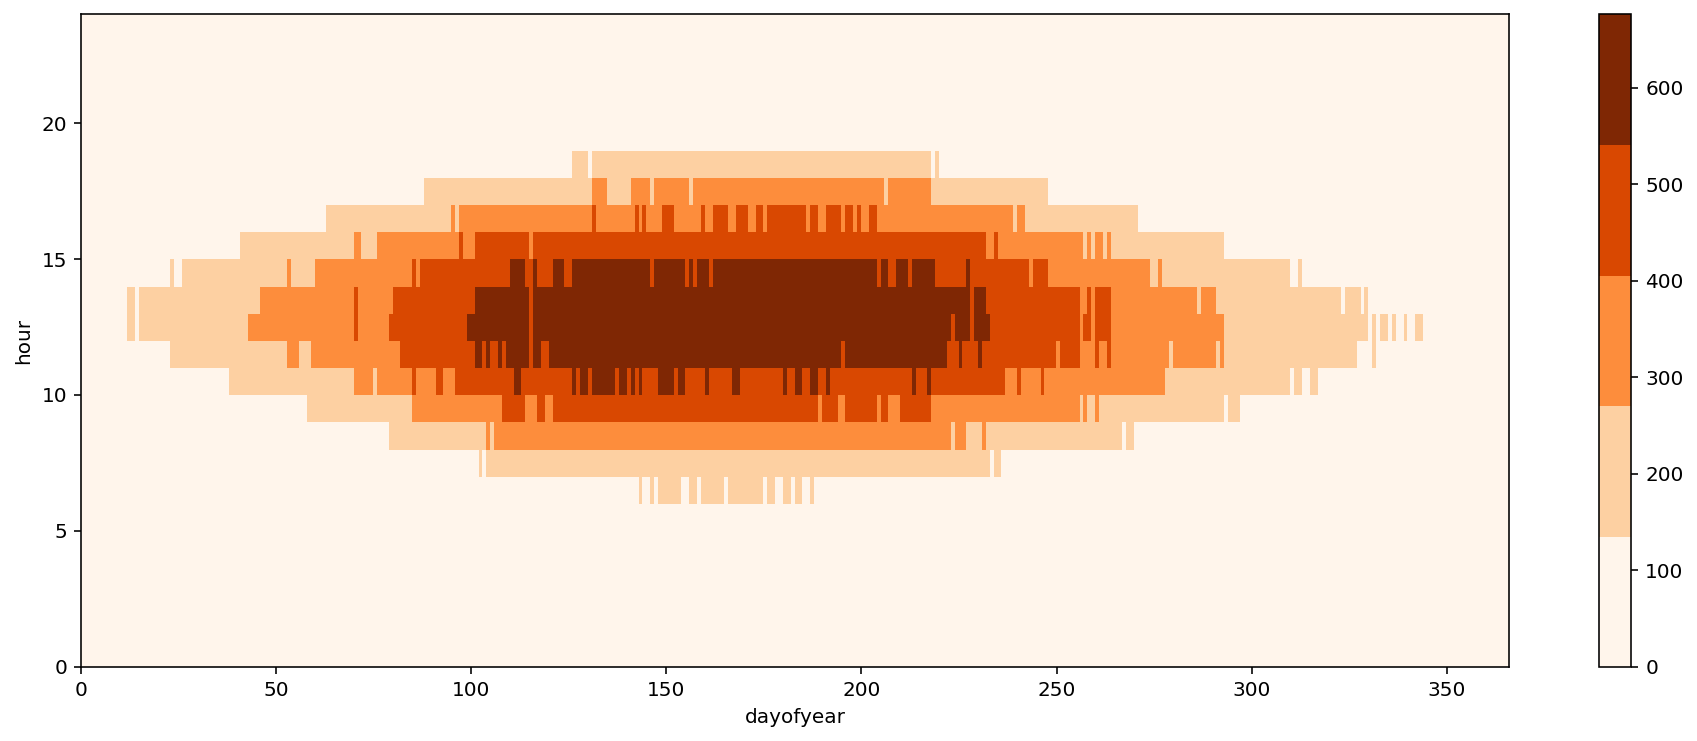

In [61]:
el.plot_heatmap(ds['ssrd'].sel(region='NL32').to_pandas(), aggfunc='mean', bins = 5)

We can plot the percentiles by day of the year. By default the dark blue represents the interquartile range while the lighter shade is the range between the 5th and the 95th percentile. You can read the documentation of the `plot_percentiles` function [here](https://enlopy.readthedocs.io/en/latest/_modules/enlopy/plot.html?highlight=plot_percentiles)

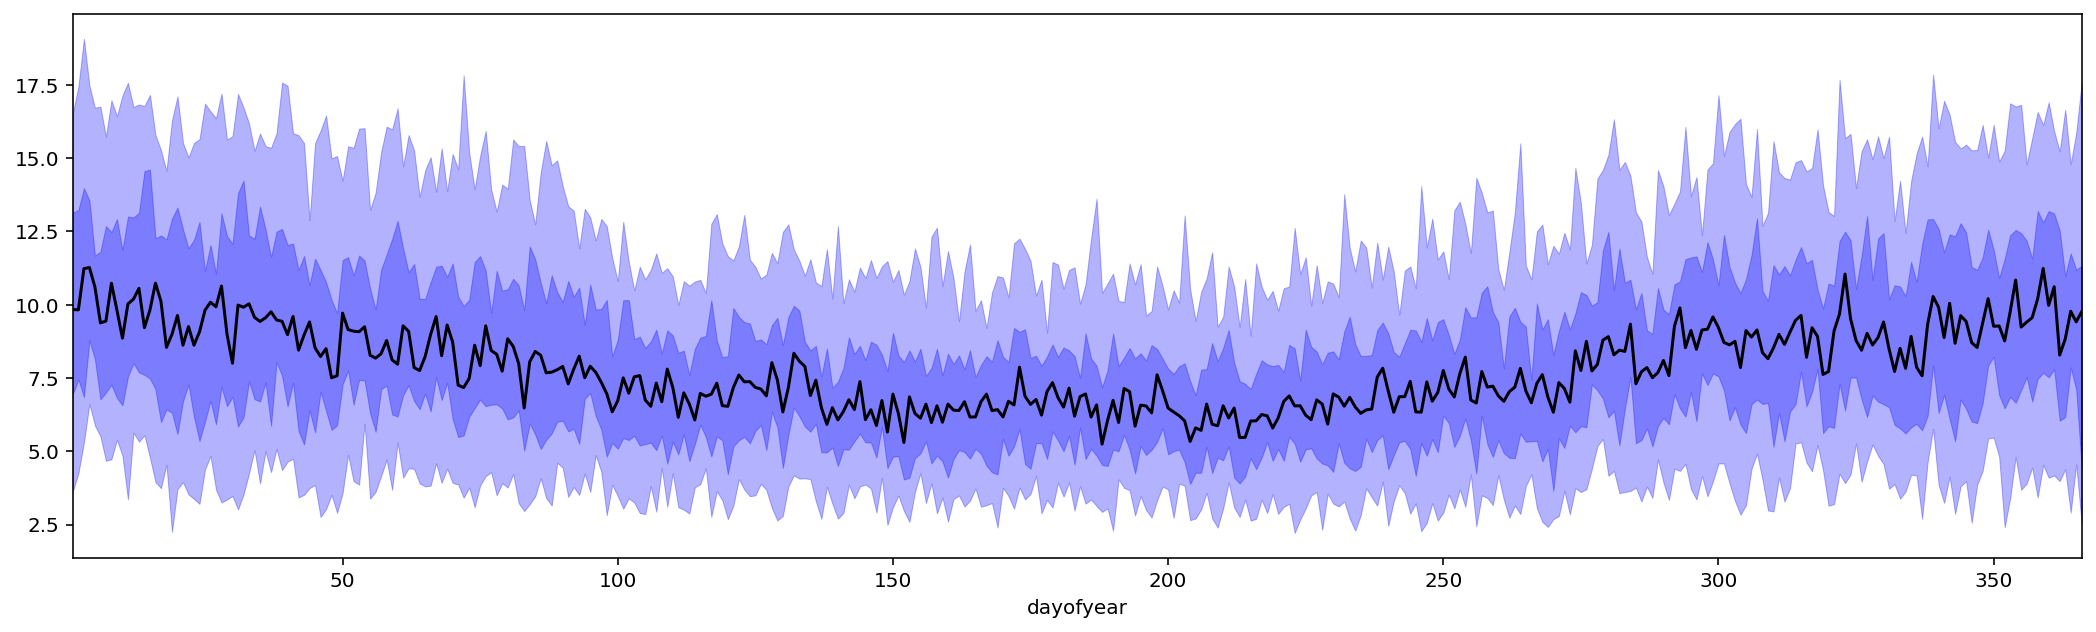

In [62]:
el.plot_percentiles(ds['ws100'].sel(region='NL32').to_pandas(), x='dayofyear', zz='year')